#### IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#### IMPORTAÇÃO DOS DADOS

In [2]:
Mo3d_1h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 1h/Mo3d.xls', header = 18)
Mo3d_2h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 2h/Mo3d.xls', header = 18)
Mo3d_3h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 3h/Mo3d.xls', header = 18)
Mo3d_4h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 4h/Mo3d.xls', header = 18)
Mo3d_5h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 5h/Mo3d.xls', header = 18)
Mo3d_10h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 10h/Mo3d.xls', header = 18)
Mo3d_15h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 15h/Mo3d.xls', header = 18)
Mo3d_20h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 20h/Mo3d.xls', header = 18)
Mo3d_Pristine = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - Pristine/Mo3d.xls', header = 18)

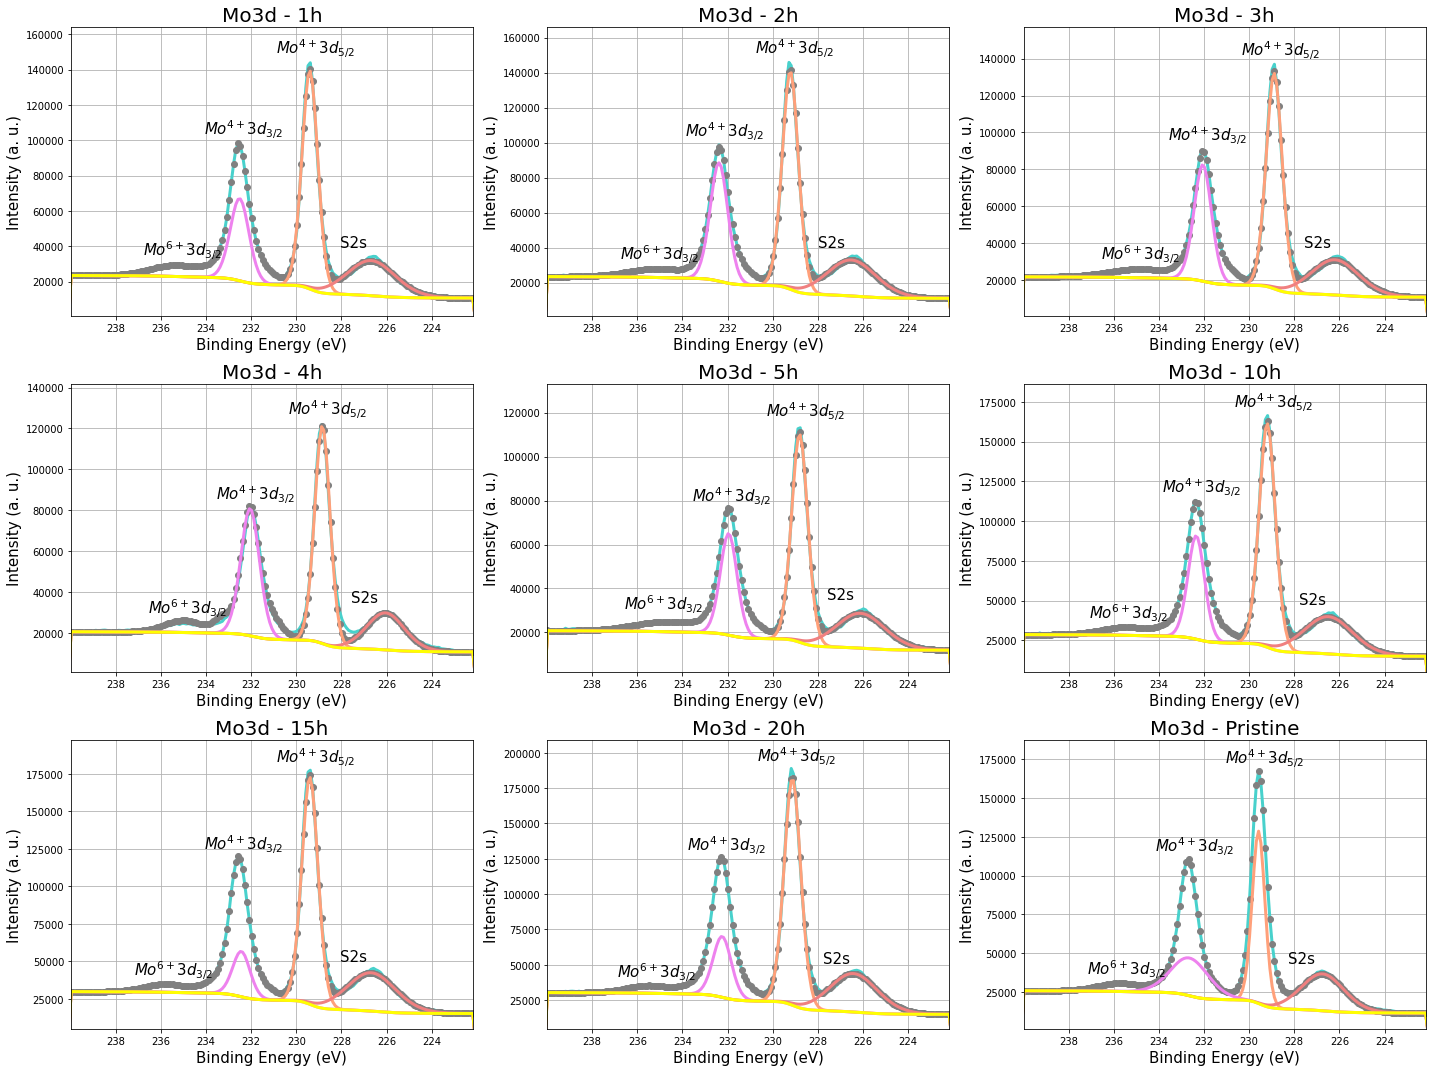

In [3]:
# Criar a figura e os subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.flatten()

# Lista dos DataFrames e títulos
dataframes = [Mo3d_1h, Mo3d_2h, Mo3d_3h, Mo3d_4h, Mo3d_5h, Mo3d_10h, Mo3d_15h, Mo3d_20h, Mo3d_Pristine]
titles = ['Mo3d - 1h', 'Mo3d - 2h', 'Mo3d - 3h', 'Mo3d - 4h', 'Mo3d - 5h', 'Mo3d - 10h', 'Mo3d - 15h', 'Mo3d - 20h', 'Mo3d - Pristine']

# Função para formatar os rótulos do eixo x
def format_x_ticks(x, pos):
    return f'{x / 1000:.0f}'  # Divide o valor por 1000 e formata como inteiro

# Definir os limites dos intervalos
intervalos = [(236000, 235000), (233000, 232000), (230000, 228000), (227000, 226000)]

# Anotações específicas
anotacoes_especificas = [
    r'$Mo^{6+}3d_{3/2}$',
    r'$Mo^{4+}3d_{3/2}$',
    r'$Mo^{4+}3d_{5/2}$',
    'S2s',
]

# Criar os gráficos
for i, df in enumerate(dataframes):
    axs[i].plot(df.iloc[:, 0], df.iloc[:, 2], label='XPS spectrum', linewidth=3, linestyle='-', color='mediumturquoise')
    axs[i].plot(df.iloc[:, 0], df.iloc[:, 4], label='Fitting', linewidth=0, marker='o', color='gray')
    axs[i].plot(df.iloc[:, 0], df.iloc[:, 5], label=r'$Mo^{4+}3d_{5/2}$', linewidth=3, linestyle='-', color='lightsalmon')
    axs[i].plot(df.iloc[:, 0], df.iloc[:, 6], label=r'$Mo^{4+}3d_{3/2}$', linewidth=3, linestyle='-', color='violet')
    axs[i].plot(df.iloc[:, 0], df.iloc[:, 7], label='S2s', linewidth=3, linestyle='-', color='lightcoral')
    #axs[i].plot(df.iloc[:, 0], df.iloc[:, 8], label=r'$Mo^{6+}3d_{5/2}$', linewidth=3, linestyle='-', color='indianred')
    #axs[i].plot(df.iloc[:, 0], df.iloc[:, 10], label=r'$Mo^{6+}3d_{3/2}$', linewidth=3, linestyle='-', color='lightgreen')
    axs[i].plot(df.iloc[:, 0], df.iloc[:, 11], label='Background', linewidth=3, linestyle='-', color='yellow')
    
    axs[i].set_title(titles[i], size=20)
    axs[i].set_xlabel('Binding Energy (eV)', size=15)
    axs[i].set_ylabel('Intensity (a. u.)', size=15)
    axs[i].tick_params(labelsize=10)
    axs[i].set_xlim(min(df.iloc[:, 0]) + 100, max(df.iloc[:, 0]) - 100)
    axs[i].set_ylim(min(df.iloc[:, 2]) - 10000, max(df.iloc[:, 2]) + 20000)
    axs[i].grid()
    axs[i].invert_xaxis()
    
    # Formatar os rótulos do eixo x
    axs[i].xaxis.set_major_formatter(FuncFormatter(format_x_ticks))

    # Identificação do maior valor em cada intervalo
    for j, interval in enumerate(intervalos):
        mask = (df.iloc[:, 0] >= interval[1]) & (df.iloc[:, 0] <= interval[0])  # Corrigindo a ordem dos limites
        if mask.any():  # Verifica se há dados no intervalo
            peak_values = df.iloc[:, 2][mask]
            if not peak_values.empty:
                highest_peak_value = peak_values.max()
                highest_peak_index = peak_values.idxmax()
                peak_x = df.iloc[:, 0][highest_peak_index]

                # Anotação específica no gráfico
                axs[i].annotate(anotacoes_especificas[j], xy=(peak_x-100, highest_peak_value),
                                xytext=(peak_x + 1500, highest_peak_value + 5000),  # arrowprops=dict(facecolor='black', shrink=0.05),
                                fontsize=15, color='black')

# Ajustar o layout
plt.tight_layout()
plt.savefig('XPS_Mo3d.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [4]:
S2p_1h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 1h/S2p.xls', header = 18)
S2p_2h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 2h/S2p.xls', header = 18)
S2p_3h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 3h/S2p.xls', header = 18)
S2p_4h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 4h/S2p.xls', header = 18)
S2p_5h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 5h/S2p.xls', header = 18)
S2p_10h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 10h/S2p.xls', header = 18)
S2p_15h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 15h/S2p.xls', header = 18)
S2p_20h = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - 20h/S2p.xls', header = 18)
S2p_Pristine = pd.read_excel('C:\JupyterLab\TCC\XPS\MoS2 - Pristine/S2p.xls', header = 18)

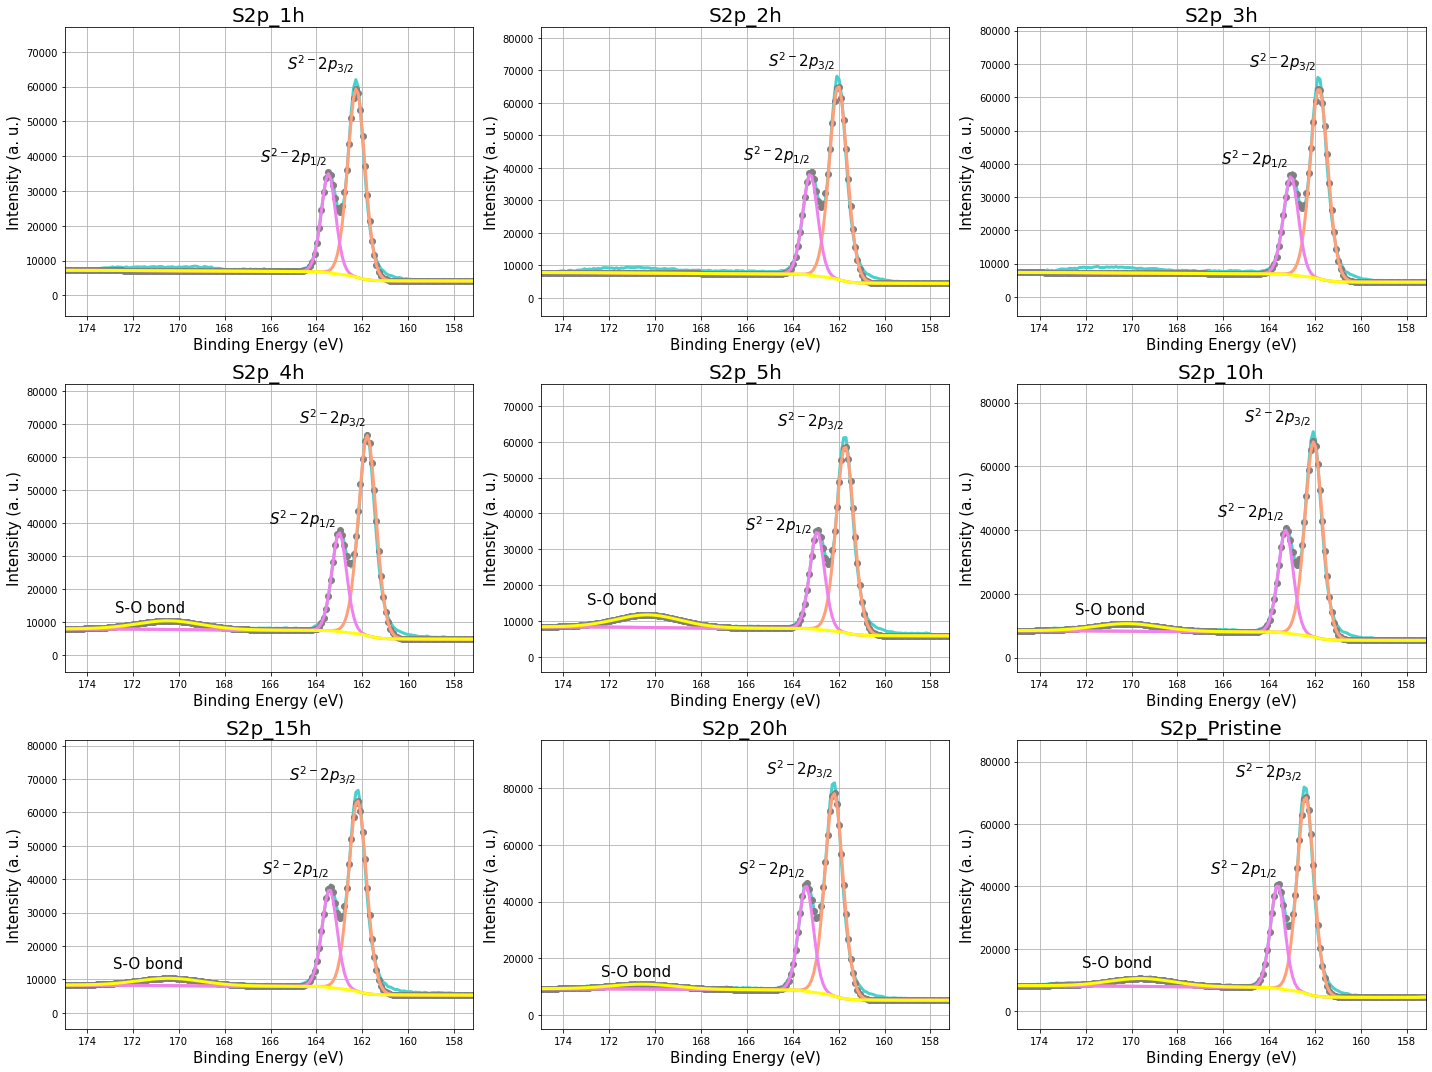

In [5]:
# Criar a figura e os subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.flatten()

# Lista dos DataFrames e títulos
dataframes = [S2p_1h, S2p_2h, S2p_3h, S2p_4h, S2p_5h, S2p_10h, S2p_15h, S2p_20h, S2p_Pristine]
titles = ['S2p_1h', 'S2p_2h', 'S2p_3h', 'S2p_4h', 'S2p_5h', 'S2p_10h', 'S2p_15h', 'S2p_20h', 'S2p_Pristine']

# Função para formatar os rótulos do eixo x
def format_x_ticks(x, pos):
    return f'{x / 1000:.0f}'  # Divide o valor por 1000 e formata como inteiro

# Definir os limites dos intervalos
intervalos = [(170000, 168000), (164000, 163000), (163000, 160000)]

# Anotações específicas
anotacoes_especificas = [
    'S-O bond',
    r'$S^{2-}2p_{1/2}$',
    r'$S^{2-}2p_{3/2}$',
]

# Criar os gráficos
for i, df in enumerate(dataframes):
    axs[i].plot(df.iloc[:, 0], df.iloc[:, 2], label='XPS spectrum', linewidth=3, linestyle='-', color='mediumturquoise')
    axs[i].plot(df.iloc[:, 0], df.iloc[:, 4], label='Fitting', linewidth=0, marker='o', color='gray')
    axs[i].plot(df.iloc[:, 0], df.iloc[:, 5], label=r'$$S^{2-}2p_{3/2}$$', linewidth=3, linestyle='-', color='lightsalmon')
    axs[i].plot(df.iloc[:, 0], df.iloc[:, 6], label=r'$S^{2-}2p_{1/2}$', linewidth=3, linestyle='-', color='violet')
    axs[i].plot(df.iloc[:, 0], df.iloc[:, 7], label='Background', linewidth=3, linestyle='-', color='yellow')
    
    axs[i].set_title(titles[i], size=20)
    axs[i].set_xlabel('Binding Energy (eV)', size=15)
    axs[i].set_ylabel('Intensity (a. u.)', size=15)
    axs[i].tick_params(labelsize=10)
    axs[i].set_xlim(min(df.iloc[:, 0]) + 100, max(df.iloc[:, 0]) - 100)
    axs[i].set_ylim(min(df.iloc[:, 2]) - 10000, max(df.iloc[:, 2]) + 15000)
    axs[i].grid()
    axs[i].invert_xaxis()
    
    # Formatar os rótulos do eixo x
    axs[i].xaxis.set_major_formatter(FuncFormatter(format_x_ticks))

    # Identificação do maior valor em cada intervalo
    for j, interval in enumerate(intervalos):
        mask = (df.iloc[:, 0] >= interval[1]) & (df.iloc[:, 0] <= interval[0])  # Corrigindo a ordem dos limites
        if mask.any():  # Verifica se há dados no intervalo
            peak_values = df.iloc[:, 2][mask]
            if not peak_values.empty:
                highest_peak_value = peak_values.max()
                highest_peak_index = peak_values.idxmax()
                peak_x = df.iloc[:, 0][highest_peak_index]
                
                if i > 2:
                    # Anotação específica no gráfico
                    axs[i].annotate(anotacoes_especificas[j], xy=(peak_x-100, highest_peak_value),
                                    xytext=(peak_x + 3000, highest_peak_value + 3000),  # arrowprops=dict(facecolor='black', shrink=0.05),
                                    fontsize=15, color='black')
                else:
                    axs[i].annotate(anotacoes_especificas[j].replace('S-O bond',''), xy=(peak_x-100, highest_peak_value),
                                    xytext=(peak_x + 3000, highest_peak_value + 3000),  # arrowprops=dict(facecolor='black', shrink=0.05),
                                    fontsize=15, color='black')

# Ajustar o layout
plt.tight_layout()
plt.savefig('XPS_S2p.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()